In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models,layers

In [44]:
IMAGE_SIZE=256
BATCH_SIZE=12
CHANNELS=3
EPOCHS=20

In [45]:
data_set=tf.keras.preprocessing.image_dataset_from_directory(
    'D:\data science projects\Black fungus project\Black Fungus data',
    shuffle=True,image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 182 files belonging to 2 classes.


In [46]:
class_names=data_set.class_names
class_names

['Fungus', 'Normal']

In [47]:
len(data_set)

16

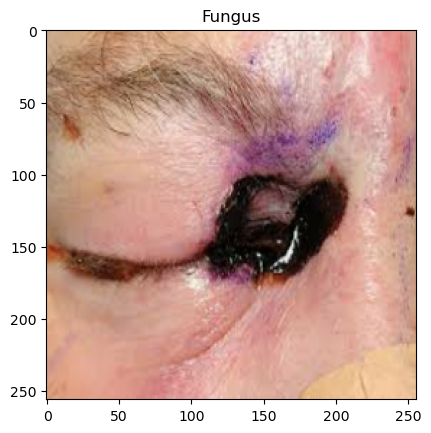

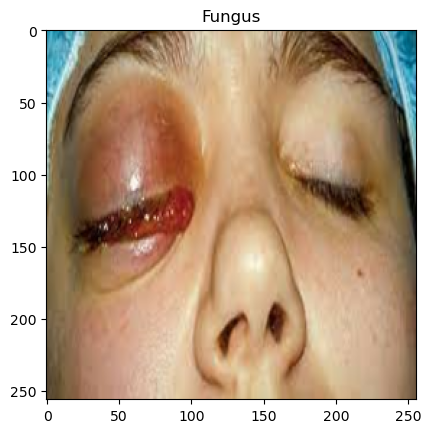

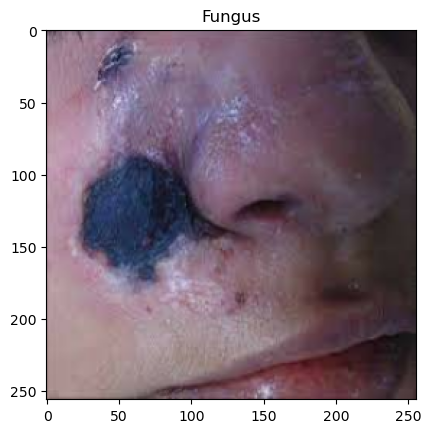

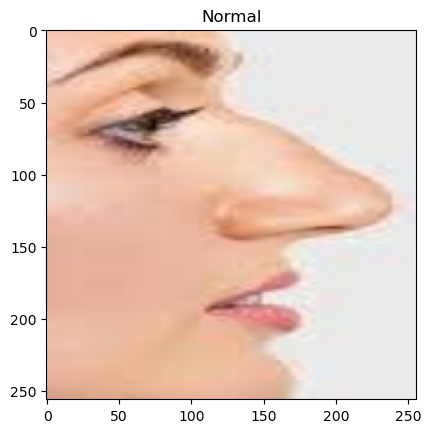

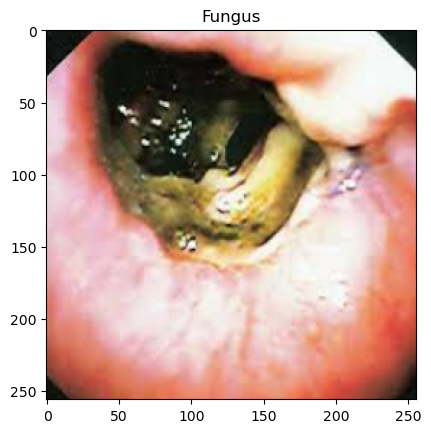

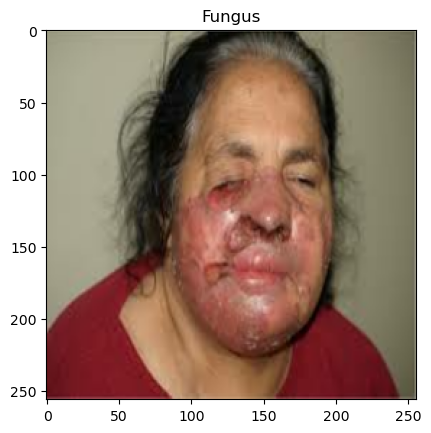

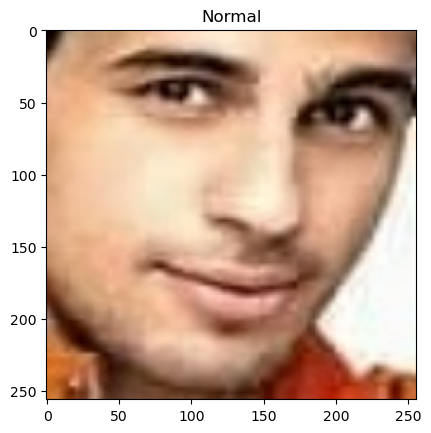

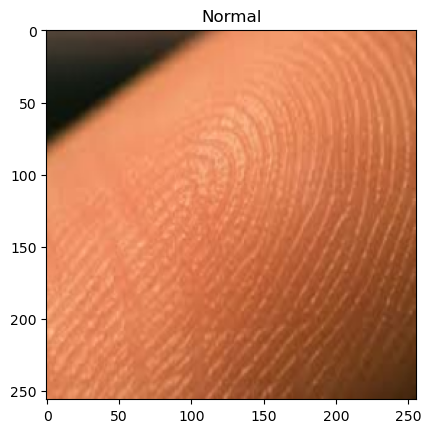

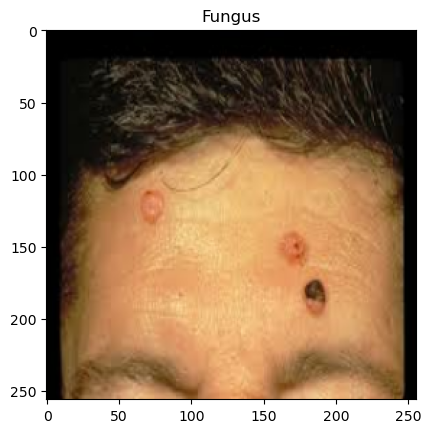

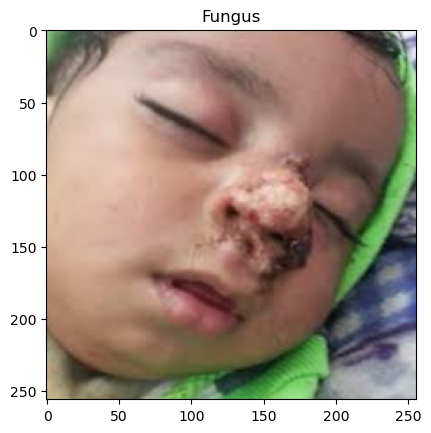

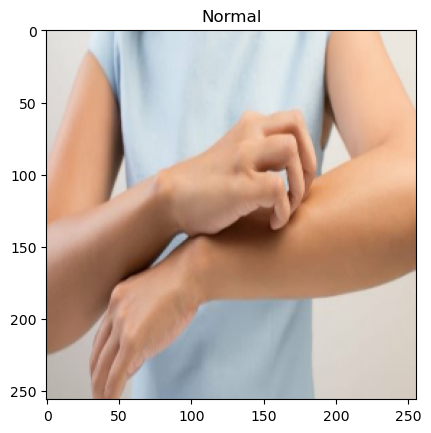

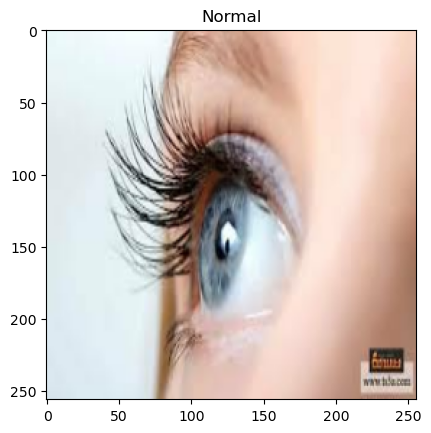

In [48]:
for image_batch, label_batch in data_set.take(1):
    for i in range(BATCH_SIZE):
        plt.subplot() 
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.show()
    

In [49]:
# 70 % train, 30% --> 10% test 20% val

train_size=0.7     

len(data_set)*train_size

11.2

In [50]:
train_ds=data_set.take(11)

In [51]:
test_ds=data_set.skip(11)    # not exactly test_ds
len(test_ds)

5

In [52]:
val_size=0.2
len(data_set)*val_size

3.2

In [53]:
val_ds = test_ds.take(3)

In [54]:
test_ds = test_ds.skip(3) 

len(test_ds)

2

In [55]:
# cache() will read the image from desk & next iteration when u we need this image it will keep that in memory, improve perfomence
# prepatch() if we are using gpu & cpu if gpu is busy to training prepatch will load next set of batch from desk

train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [56]:
# IF A IMAGE IS SOME DIFFERENT DIMENSION THIS LAYER TAKE CARE OF RESIZING IT (INT0 256,256)


resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [57]:
# augmentation helps to create some new samples like horizontal,contrast, rotation,zoom.(to make the model robust)

data_augmentatioin=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [58]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=2


model=models.Sequential([  
    resize_and_rescale,
    data_augmentatioin,
    layers.Conv2D(filters=16,kernel_size=(2,2),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(2,2),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(2,2),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(2,2),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(2,2),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])
model.build(input_shape=input_shape)

In [59]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (12, 256, 256, 3)         0         
_________________________________________________________________
sequential_4 (Sequential)    (12, 256, 256, 3)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (12, 255, 255, 16)        208       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (12, 127, 127, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (12, 126, 126, 32)        2080      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (12, 63, 63, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (12, 62, 62, 32)         

In [60]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [61]:
history=model.fit(
    train_ds,
    
    
     
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
11/11 [==============================] - 25s 2s/step - loss: 0.7034 - accuracy: 0.4773 - val_loss: 0.6909 - val_accuracy: 0.6667
Epoch 2/20
11/11 [==============================] - 12s 1s/step - loss: 0.6927 - accuracy: 0.5379 - val_loss: 0.6858 - val_accuracy: 0.7778
Epoch 3/20
11/11 [==============================] - 13s 1s/step - loss: 0.6849 - accuracy: 0.5909 - val_loss: 0.6499 - val_accuracy: 0.6389
Epoch 4/20
11/11 [==============================] - 13s 1s/step - loss: 0.6719 - accuracy: 0.5606 - val_loss: 0.6989 - val_accuracy: 0.3889
Epoch 5/20
11/11 [==============================] - 12s 1s/step - loss: 0.6097 - accuracy: 0.6591 - val_loss: 0.9317 - val_accuracy: 0.3889
Epoch 6/20
11/11 [==============================] - 12s 1s/step - loss: 0.6309 - accuracy: 0.6515 - val_loss: 0.4917 - val_accuracy: 0.8333
Epoch 7/20
11/11 [==============================] - 13s 1s/step - loss: 0.4993 - accuracy: 0.7879 - val_loss: 0.3320 - val_accuracy: 0.8611
Epoch 8/20
11/11 [==

In [62]:
scores=model.evaluate(test_ds)

2/2 [==============================] - 2s 185ms/step - loss: 0.3764 - accuracy: 0.8571


In [63]:
scores

[0.37641260027885437, 0.8571428656578064]

In [64]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

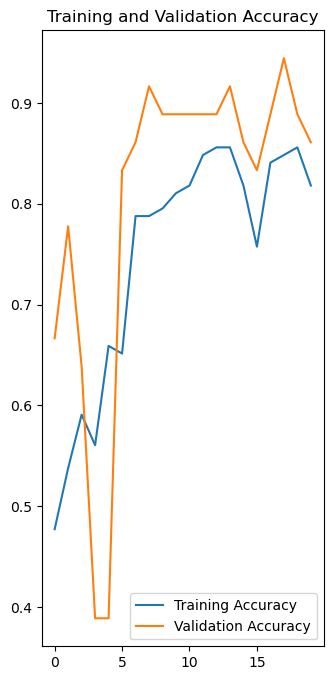

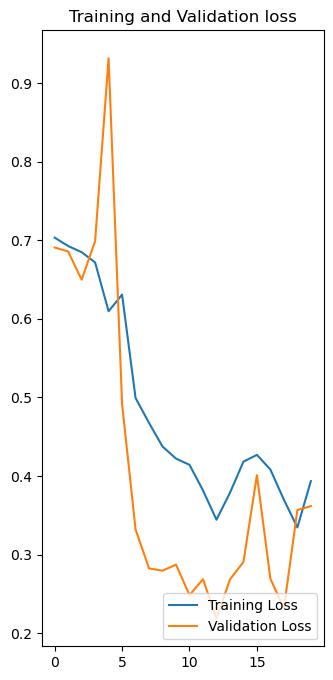

In [65]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')

plt.show()

first image to prdict
actual label :  Normal
Consider rewriting this model with the Functional API.
predicted label :  Normal


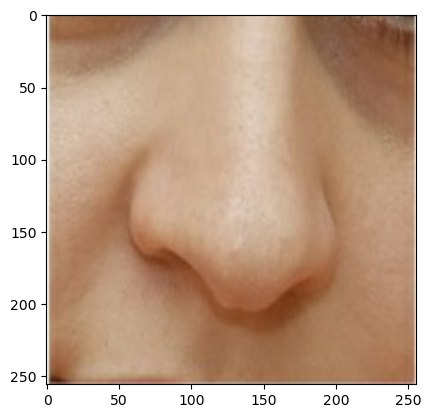

In [66]:
for images_batch,labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print('first image to prdict')
    plt.imshow(first_image)
    print('actual label : ',class_names[first_label])
    
    batch_prediction = model.predict([images_batch])
    print('predicted label : ',class_names[np.argmax(batch_prediction[0])])
    plt.show()

In [67]:
def predict(model,img):
    
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

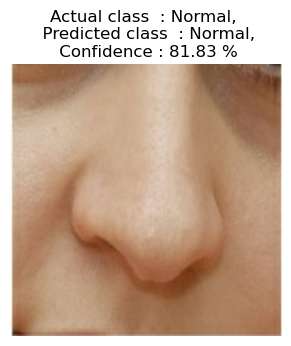

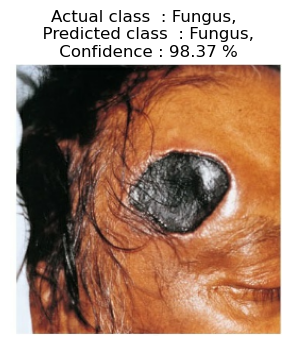

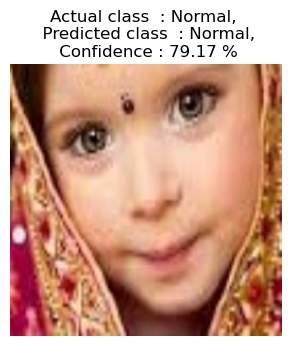

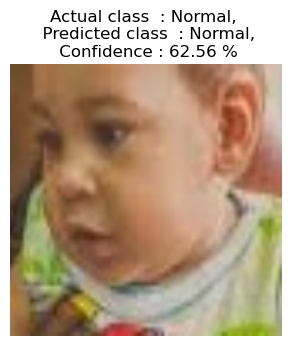

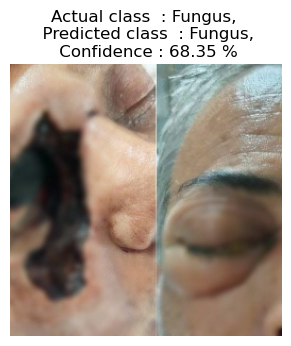

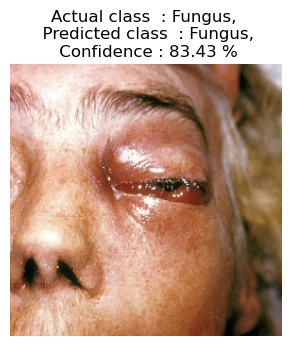

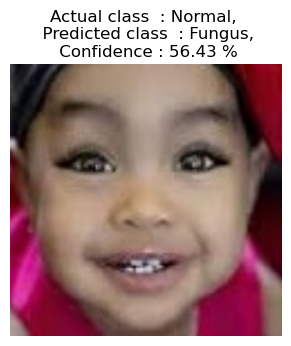

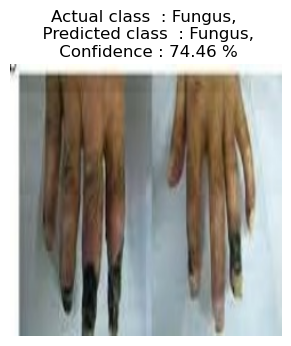

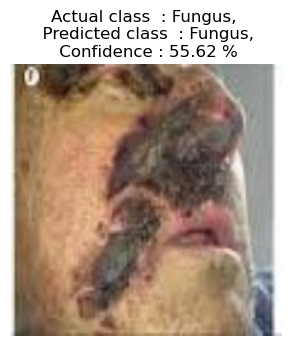

In [74]:
for images,labels in test_ds.take(1):
    for i in range(9):
        plt.figure(figsize=(12,12))
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
    
        
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual class  : {actual_class}, \n  Predicted class  : {predicted_class}, \n Confidence : {confidence} %")
        plt.axis('off')
        plt.show()


In [42]:
model_version=1
model.save(f"./models/{model_version}")

INFO:tensorflow:Assets written to: ./models/1\assets


In [80]:
################################################################################################################################

In [89]:
image_path='D:\data science projects\Black fungus project\Image'

In [92]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [93]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [108]:
pic = load_img('D:\data science projects\Black fungus project\Image\C_Normal.jpg')


TypeError: 'ImageDataGenerator' object is not callable

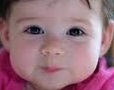

In [104]:
pic

In [105]:
pic_array = img_to_array(pic)

In [106]:
pic_array

array([[[  5.,  10.,   6.],
        [  5.,   7.,   4.],
        [  8.,  10.,   7.],
        ...,
        [107., 111., 114.],
        [ 98., 107., 106.],
        [ 96., 105., 104.]],

       [[  7.,  12.,   8.],
        [  7.,   9.,   6.],
        [  8.,  10.,   7.],
        ...,
        [111., 115., 118.],
        [101., 107., 107.],
        [ 93.,  99.,  99.]],

       [[  8.,  13.,   9.],
        [  9.,  11.,   8.],
        [  8.,  10.,   7.],
        ...,
        [114., 115., 119.],
        [111., 117., 117.],
        [ 98., 104., 104.]],

       ...,

       [[136.,  27.,  82.],
        [121.,  13.,  65.],
        [112.,   2.,  51.],
        ...,
        [207.,  81., 163.],
        [199.,  74., 166.],
        [198.,  73., 165.]],

       [[134.,  27.,  79.],
        [118.,  10.,  60.],
        [108.,   0.,  49.],
        ...,
        [196.,  73., 154.],
        [191.,  72., 162.],
        [198.,  79., 169.]],

       [[130.,  23.,  75.],
        [112.,   6.,  55.],
        [106.,  

In [107]:
    
    batch_prediction = model.predict([images_batch])
    print('predicted label : ',class_names[np.argmax(pic_array)])
    plt.show()

IndexError: list index out of range

In [ ]:
for images_batch,labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print('first image to prdict')
    plt.imshow(first_image)
    print('actual label : ',class_names[first_label])
    
    batch_prediction = model.predict([images_batch])
    print('predicted label : ',class_names[np.argmax(batch_prediction[0])])
    plt.show()

In [90]:

for images_batch,labels_batch in test_ds.take(1):
    print(images_batch[0])


tf.Tensor(
[[[255.       250.       239.      ]
  [247.40234  231.76562  217.72656 ]
  [189.23633  162.4414   141.44531 ]
  ...
  [ 65.5918    49.59375   34.79297 ]
  [ 88.07422   74.833984  59.554688]
  [199.       185.       172.      ]]

 [[255.       250.95703  239.95703 ]
  [248.85658  233.44977  219.4107  ]
  [191.15039  164.92932  143.6463  ]
  ...
  [ 76.98084   60.408016  45.79883 ]
  [ 98.54268   84.21177   69.296036]
  [204.74219  190.74219  177.74219 ]]

 [[255.       251.86914  240.73828 ]
  [249.74545  234.7566   220.58669 ]
  [192.32031  166.8294   145.1813  ]
  ...
  [ 92.66406   75.543304  60.98599 ]
  [112.65679   97.13726   82.61773 ]
  [211.91602  197.91602  184.91602 ]]

 ...

 [[255.       252.60742  240.21484 ]
  [227.12314  214.09384  201.04091 ]
  [126.88222  106.21391   92.27412 ]
  ...
  [151.54535  116.102325  95.67357 ]
  [166.66379  135.00699  113.74015 ]
  [235.17773  206.26172  185.39258 ]]

 [[255.       250.91406  239.95703 ]
  [230.09097  219.33037  2